# MNIST Classification using Classical Machine Learning
This notebook demonstrates image classification on the MNIST dataset using Logistic Regression from `scikit-learn`.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten 28x28 images into vectors of size 784
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# Normalize the pixel values
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_test_flat = scaler.transform(x_test_flat)

In [3]:
# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_flat, y_train)

LogisticRegression(max_iter=1000)

In [6]:
# Predict and evaluate the model
y_pred = log_reg.predict(x_test_flat)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9217

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



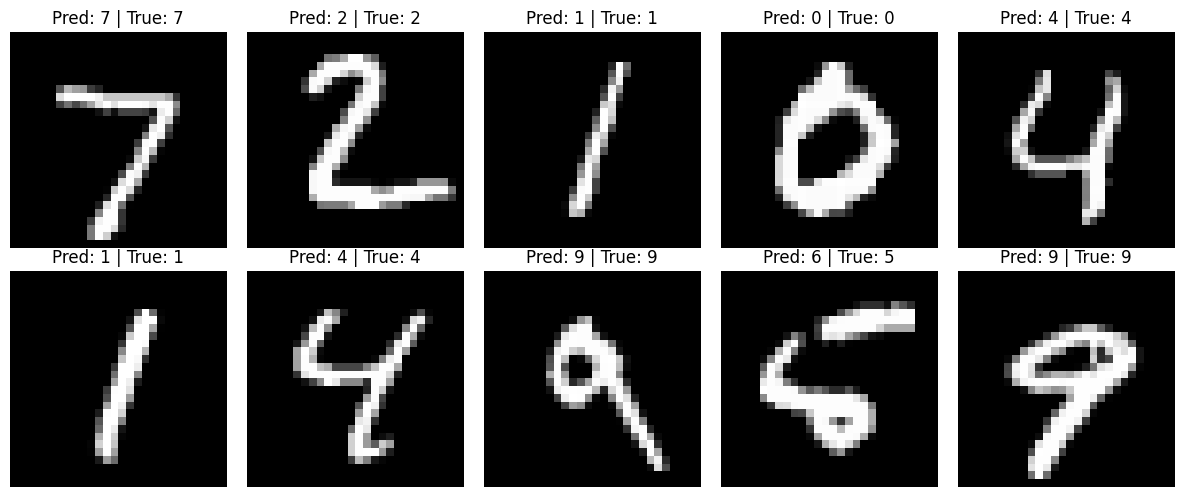

In [7]:
# Show a few predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]} | True: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()